In [144]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [76]:
#NEW
with open('lol_data.json', 'r') as file:
   newdata = json.load(file)

In [77]:
#NEW
newdf = pd.DataFrame(newdata)
newdf.shape

(882, 13)

In [78]:
#NEW
newdf.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,teams
0,1546074305758,873,2942016788,ARAM,MATCHED_GAME,8.24.255.8524,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,450,11,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
1,1546072056795,1836,2942003298,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,400,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
2,1546070609011,1023,2942000078,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
3,1546063787803,2030,2941949842,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1546061423214,1930,2941921008,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


In [95]:
#NEW
newgames = newdf[['participants','gameMode']]
newparticipants = newdf['participants']

newclassicgames = newgames[newgames['gameMode'] == 'CLASSIC']['participants']
newclassicgames[1]

[{'participantId': 1,
  'teamId': 100,
  'championId': 223,
  'spell1Id': 14,
  'spell2Id': 4,
  'highestAchievedSeasonTier': 'UNRANKED',
  'stats': {'participantId': 1,
   'win': False,
   'item0': 3190,
   'item1': 3401,
   'item2': 3009,
   'item3': 3067,
   'item4': 0,
   'item5': 0,
   'item6': 3340,
   'kills': 2,
   'deaths': 10,
   'assists': 4,
   'largestKillingSpree': 0,
   'largestMultiKill': 1,
   'killingSprees': 0,
   'longestTimeSpentLiving': 433,
   'doubleKills': 0,
   'tripleKills': 0,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 27896,
   'magicDamageDealt': 8606,
   'physicalDamageDealt': 8015,
   'trueDamageDealt': 11274,
   'largestCriticalStrike': 0,
   'totalDamageDealtToChampions': 6856,
   'magicDamageDealtToChampions': 5389,
   'physicalDamageDealtToChampions': 732,
   'trueDamageDealtToChampions': 734,
   'totalHeal': 4088,
   'totalUnitsHealed': 5,
   'damageSelfMitigated': 29510,
   'damageDealtToObjectives': 510,
 

In [ ]:
#NEW
newgames.head()

In [115]:
stats_keep_columns = ['participantId','win','item0','item1','item2','item3','item4','item5',
'item6','kills','deaths','assists','longestTimeSpentLiving','totalDamageDealtToChampions',
'magicDamageDealtToChampions', 'physicalDamageDealtToChampions','trueDamageDealtToChampions',
'damageDealtToTurrets','visionScore','timeCCingOthers','goldEarned','turretKills',
'perk0','perk1','perk2', 'perk3', 'perk4', 'perk5']

def create_row(row):
    '''Unpacks each list of dictionaries, from each CLASSIC game, to create a pandas row.
    Each row is organized such that the features of the winning team are displayed to the 
    left.'''
      
    a_row = []   
    for players in row:
        stats_player = pd.DataFrame.from_dict(players['stats'], orient = 'index') #Turns the dict into a pandas row
        a_row.append(stats_player.T[stats_keep_columns]) #Transposes then extracts
        the_row = pd.concat(a_row, axis = 1)

    player_indexes = [index for index, col_name in enumerate(the_row) if col_name == 'participantId']
    if the_row.iloc[:,1].bool() == False:           
        losers = the_row.iloc[:,:player_indexes[5]]     
        the_row = pd.concat([the_row, losers], axis = 1)
        the_row = the_row.iloc[:,player_indexes[5]:]        
    the_row = the_row.drop('win',axis=1) #Drops the win columns
    return the_row 

    
newclassicwoof = newclassicgames.apply(create_row)
newclassicwoof

1        participantId item0 item1 item2 item3 item4 ...
2        participantId item0 item1 item2 item3 item4 ...
3        participantId item0 item1 item2 item3 item4 ...
4        participantId item0 item1 item2 item3 item4 ...
5        participantId item0 item1 item2 item3 item4 ...
6        participantId item0 item1 item2 item3 item4 ...
7        participantId item0 item1 item2 item3 item4 ...
8        participantId item0 item1 item2 item3 item4 ...
9        participantId item0 item1 item2 item3 item4 ...
10       participantId item0 item1 item2 item3 item4 ...
11       participantId item0 item1 item2 item3 item4 ...
12       participantId item0 item1 item2 item3 item4 ...
13       participantId item0 item1 item2 item3 item4 ...
14       participantId item0 item1 item2 item3 item4 ...
15       participantId item0 item1 item2 item3 item4 ...
16       participantId item0 item1 item2 item3 item4 ...
17       participantId item0 item1 item2 item3 item4 ...
18       participantId item0 it

In [116]:
newclassicwoof[870]

,participantId,item0,item1,item2,item3,item4,item5,item6,kills,deaths,...,visionScore,timeCCingOthers,goldEarned,turretKills,perk0,perk1,perk2,perk3,perk4,perk5
0,6,1054,3211,3153,3047,3078,1028,3340,11,0,...,12,22,7349,0,8437,8473,8429,8451,8304,8347


In [56]:
chunks = []
for chunk in newclassicwoof:
        chunks.append(chunk)    
yes = pd.concat(chunks)

new_names = []
player_indexes = [index for index, col_name in enumerate(yes) if col_name == 'participantId']
yes = yes.drop('participantId', axis=1)

for player in range(5):
    if player != 0:
        wp = yes.iloc[:,player_indexes[player]:player_indexes[player+1]].add_prefix('WP'+str(player+1)+'_')
        new_names.append(wp)
    else:
        wp =yes.iloc[:,:player_indexes[player+1]].add_prefix('WP'+str(player+1)+'_')
        new_names.append(wp)
        
for player in range(5,10):
    if player != 9:
        lp = yes.iloc[:,player_indexes[player]:player_indexes[player+1]].add_prefix('LP'+str(player-4)+'_')
        new_names.append(lp)
    else:
        yes.iloc[:,player_indexes[player]:].add_prefix('LP'+str(player-4)+'_')

yes = pd.concat(new_names, axis=1)
yes.reset_index(drop=True)

,WP1_item0,WP1_item1,WP1_item2,WP1_item3,WP1_item4,WP1_item5,WP1_item6,WP1_kills,WP1_deaths,WP1_assists,...,LP4_perk5,LP4_item0,LP4_item1,LP4_item2,LP4_item3,LP4_item4,LP4_item5,LP4_item6,LP4_kills,LP4_deaths
0,3742,3800,3047,3010,1031,1033,3340,4,10,11,...,8106,3152,2421,3143,3040,3020,3089,3340,13,9
1,3035,1055,3006,3142,3147,1037,3340,5,5,12,...,8232,3092,3102,2033,1004,3158,1052,3340,2,6
2,3158,3153,3078,3042,2059,1037,3340,9,2,11,...,8463,1402,2031,3009,3100,0,0,3364,3,5
3,1400,2031,3071,3158,3742,0,3340,10,2,8,...,8232,3157,0,3092,1057,3117,2053,3364,4,4
4,3814,3147,3812,3142,3158,3095,3340,18,8,7,...,8236,3139,1033,3156,3025,3042,3111,3363,9,13
5,1056,3802,1001,2003,1052,1026,3340,1,2,4,...,8236,2033,3047,3044,0,0,0,3340,0,4
6,2031,2403,3041,3802,3157,3158,3340,6,1,8,...,8210,1419,2031,3111,3124,0,0,3364,2,6
7,3109,0,3401,0,0,3117,3364,2,1,12,...,8352,2031,3748,2055,1001,1400,0,3364,3,7
8,3142,1055,3006,3094,0,0,3340,7,2,12,...,8233,2055,2031,3047,3057,1402,0,3340,2,4
9,3153,1055,3031,3006,3085,2055,3364,8,6,17,...,8236,3151,3027,3020,3089,3285,0,3340,14,6


In [117]:
chunks = []
for chunk in newclassicwoof:
    chunks.append(chunk)    
yes = pd.concat(chunks)

player_indexes = [index for index, col_name in enumerate(yes) if col_name == 'participantId']
yes = yes.drop('participantId', axis=1)

wp_1 = yes.iloc[:,:player_indexes[1]].add_prefix('WP1_')
wp_2 = yes.iloc[:,player_indexes[1]:player_indexes[2]].add_prefix('WP2_')
wp_3 = yes.iloc[:,player_indexes[2]:player_indexes[3]].add_prefix('WP3_')
wp_4 = yes.iloc[:,player_indexes[3]:player_indexes[4]].add_prefix('WP4_')
wp_5 = yes.iloc[:,player_indexes[4]:player_indexes[5]].add_prefix('WP5_')

lp_1 = yes.iloc[:,player_indexes[5]:player_indexes[6]].add_prefix('LP1_')
lp_2 = yes.iloc[:,player_indexes[6]:player_indexes[7]].add_prefix('LP2_')
lp_3 = yes.iloc[:,player_indexes[7]:player_indexes[8]].add_prefix('LP3_')
lp_4 = yes.iloc[:,player_indexes[8]:player_indexes[9]].add_prefix('LP4_')
lp_5 = yes.iloc[:,player_indexes[9]:].add_prefix('LP5_')

new_names = [wp_1, wp_2, wp_3, wp_4, wp_5, lp_1, lp_2, lp_3, lp_4, lp_5]
yes = pd.concat(new_names, axis=1)
yes.reset_index(drop=True)

,WP1_item0,WP1_item1,WP1_item2,WP1_item3,WP1_item4,WP1_item5,WP1_item6,WP1_kills,WP1_deaths,WP1_assists,...,LP5_visionScore,LP5_timeCCingOthers,LP5_goldEarned,LP5_turretKills,LP5_perk0,LP5_perk1,LP5_perk2,LP5_perk3,LP5_perk4,LP5_perk5
0,3040,3020,3285,1056,3135,0,3363,11,1,6,...,12,23,9299,0,8128,8143,8138,8105,9111,8014
1,2003,0,1052,1001,3285,1056,3340,1,1,4,...,6,10,4296,0,8010,9111,9104,8014,8304,8352
2,2031,3143,3050,3401,3047,2055,3364,3,8,22,...,14,2,12123,0,8359,8304,8345,8352,8473,8446
3,3020,3146,3157,3113,0,0,3340,5,7,6,...,40,36,11961,1,8112,8139,8136,8106,8446,8473
4,3222,3107,3098,3041,3504,3111,3363,3,10,31,...,5,19,13122,1,8112,8143,8138,8106,8236,8224
5,2033,3077,3078,3111,3052,0,3340,8,3,3,...,17,46,5412,0,8439,8446,8429,8451,8345,8347
6,2033,3057,3113,3041,3020,3027,3340,6,2,15,...,6,7,7038,0,8021,9111,9105,8299,8139,8135
7,1416,2031,3111,3146,1028,0,3340,9,1,6,...,7,6,8770,0,8010,9111,9104,8014,8234,8236
8,3157,3100,3102,3020,3285,1058,3364,21,5,15,...,21,23,12890,1,8124,8143,8138,8134,8234,8232
9,3077,3071,2031,3111,3742,1036,3340,10,4,3,...,8,3,5626,0,8112,8143,8138,8106,8453,8473


In [118]:
#TEAM DATA

agg = ['kills', 'deaths', 'assists', 'physicalDamageDealtToChampions', 'magicDamageDealtToChampions',
       'trueDamageDealtToChampions','totalDamageDealtToChampions', 'timeCCingOthers', 'visionScore',
       'longestTimeSpentLiving', 'goldEarned', 'damageDealtToTurrets']

team = pd.DataFrame()

for feature in agg: 
    team['Win_'+ feature] = yes[[col for col in yes.columns if 'WP' in col and feature in col]].sum(axis=1)
    team['Lose_'+ feature] = yes[[col for col in yes.columns if 'LP' in col and feature in col]].sum(axis=1)
team.reset_index(drop=True)

,Win_kills,Lose_kills,Win_deaths,Lose_deaths,Win_assists,Lose_assists,Win_physicalDamageDealtToChampions,Lose_physicalDamageDealtToChampions,Win_magicDamageDealtToChampions,Lose_magicDamageDealtToChampions,...,Win_timeCCingOthers,Lose_timeCCingOthers,Win_visionScore,Lose_visionScore,Win_longestTimeSpentLiving,Lose_longestTimeSpentLiving,Win_goldEarned,Lose_goldEarned,Win_damageDealtToTurrets,Lose_damageDealtToTurrets
0,35.0,19.0,14.0,53.0,51.0,14.0,19575.0,31935.0,60725.0,17582.0,...,162.0,110.0,152.0,74.0,3174.0,3258.0,59728.0,46428.0,25144.0,6944.0
1,21.0,7.0,4.0,28.0,23.0,9.0,21335.0,5745.0,14970.0,11061.0,...,39.0,25.0,58.0,36.0,2073.0,1777.0,38943.0,21630.0,26203.0,131.0
2,45.0,40.0,35.0,64.0,76.0,67.0,56356.0,79690.0,67135.0,30573.0,...,179.0,109.0,176.0,138.0,3307.0,2065.0,67959.0,61023.0,19576.0,8315.0
3,37.0,32.0,25.0,49.0,46.0,35.0,71227.0,68976.0,25272.0,8537.0,...,98.0,114.0,165.0,139.0,3847.0,3544.0,67811.0,58862.0,28886.0,9951.0
4,51.0,60.0,43.0,76.0,88.0,59.0,107904.0,83768.0,45334.0,63939.0,...,186.0,199.0,130.0,175.0,2361.0,2190.0,73771.0,66039.0,24600.0,15711.0
5,36.0,20.0,14.0,50.0,38.0,18.0,35344.0,21916.0,17598.0,17952.0,...,80.0,108.0,49.0,53.0,1750.0,1715.0,45492.0,32409.0,16578.0,4497.0
6,28.0,18.0,15.0,38.0,54.0,18.0,35694.0,19392.0,31182.0,20326.0,...,99.0,68.0,74.0,57.0,2656.0,3038.0,42895.0,35251.0,20022.0,5601.0
7,46.0,24.0,16.0,70.0,52.0,18.0,44222.0,46080.0,43942.0,37529.0,...,78.0,171.0,98.0,55.0,3422.0,2180.0,58793.0,39321.0,22498.0,5489.0
8,49.0,39.0,24.0,65.0,99.0,47.0,26853.0,35527.0,82705.0,63113.0,...,262.0,98.0,180.0,159.0,4225.0,3070.0,72048.0,61831.0,24836.0,27938.0
9,41.0,23.0,18.0,55.0,38.0,21.0,27141.0,34357.0,36730.0,15954.0,...,96.0,105.0,89.0,42.0,3087.0,2076.0,48789.0,34677.0,21661.0,2481.0


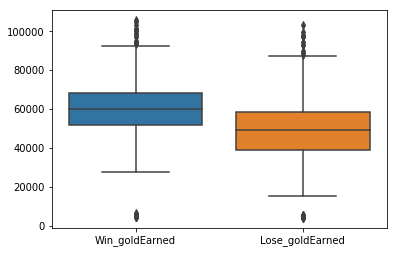

In [141]:
sns.boxplot(data=team[['Win_goldEarned','Lose_goldEarned']]);

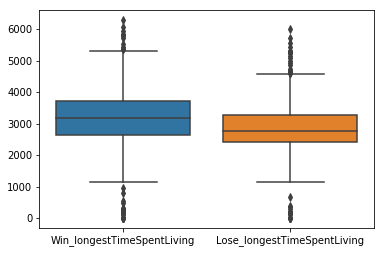

In [142]:
sns.boxplot(data=team[['Win_longestTimeSpentLiving','Lose_longestTimeSpentLiving']]);

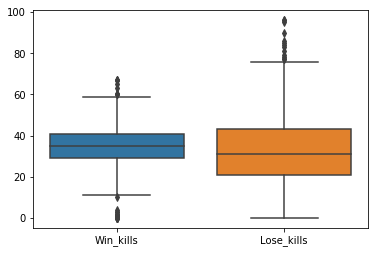

In [119]:
sns.boxplot(data=team[['Win_kills','Lose_kills']]);

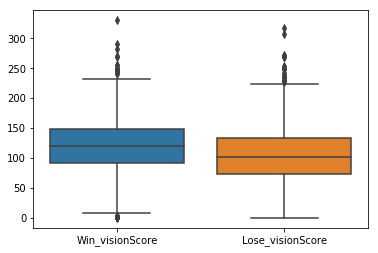

In [120]:
sns.boxplot(data=team[['Win_visionScore','Lose_visionScore']]);

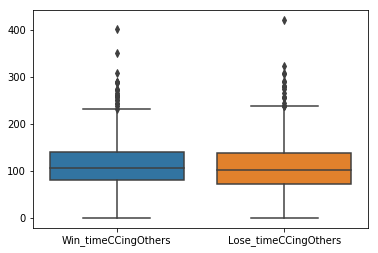

In [121]:
sns.boxplot(data=team[['Win_timeCCingOthers','Lose_timeCCingOthers']]);

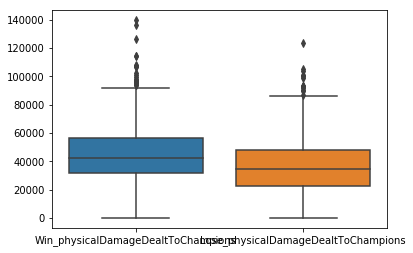

In [122]:
sns.boxplot(data=team[['Win_physicalDamageDealtToChampions','Lose_physicalDamageDealtToChampions']]);

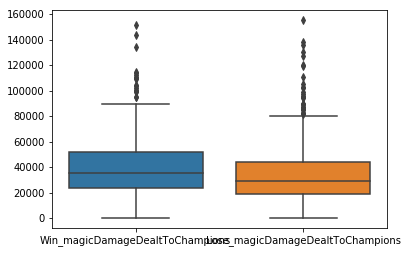

In [123]:
sns.boxplot(data=team[['Win_magicDamageDealtToChampions','Lose_magicDamageDealtToChampions']]);

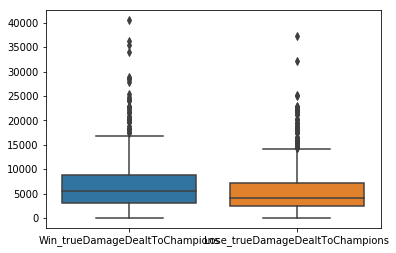

In [124]:
sns.boxplot(data=team[['Win_trueDamageDealtToChampions','Lose_trueDamageDealtToChampions']]);

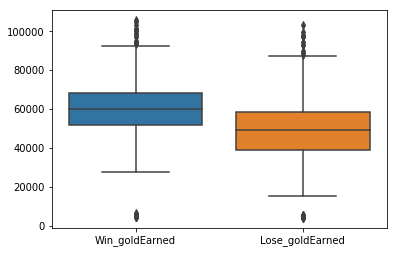

In [143]:
sns.boxplot(data=team[['Win_goldEarned','Lose_goldEarned']]);

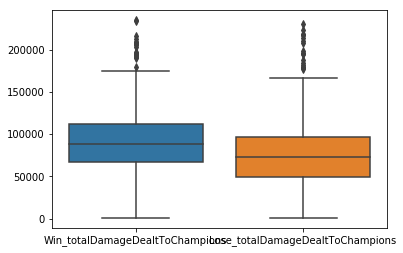

In [125]:
sns.boxplot(data=team[['Win_totalDamageDealtToChampions','Lose_totalDamageDealtToChampions']]);

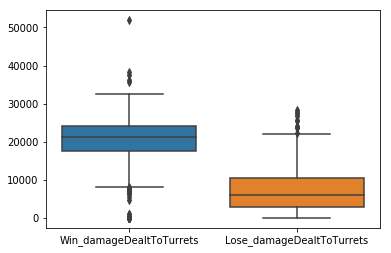

In [126]:
sns.boxplot(data=team[['Win_damageDealtToTurrets','Lose_damageDealtToTurrets']]);

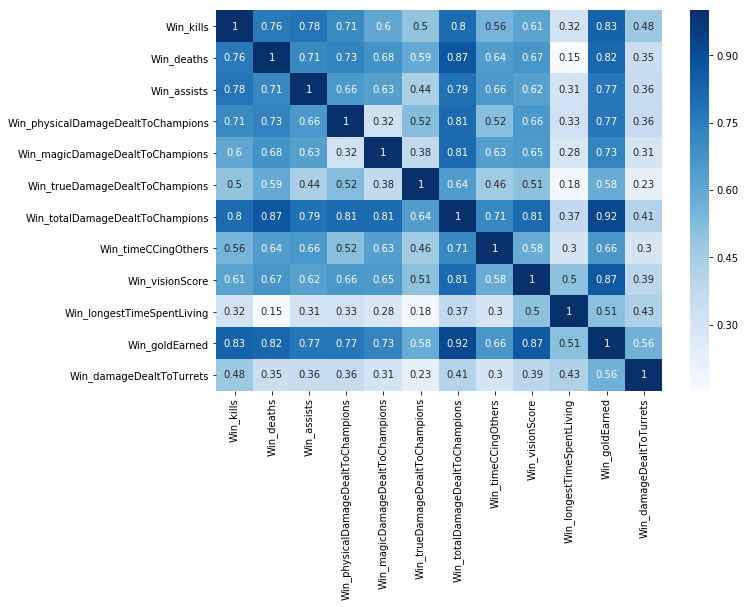

In [127]:
winners = team[[col for col in team.columns if 'Win' in col]]

plt.figure(figsize=(10, 7))
sns.heatmap(winners.corr(), annot=True, cmap='Blues');              

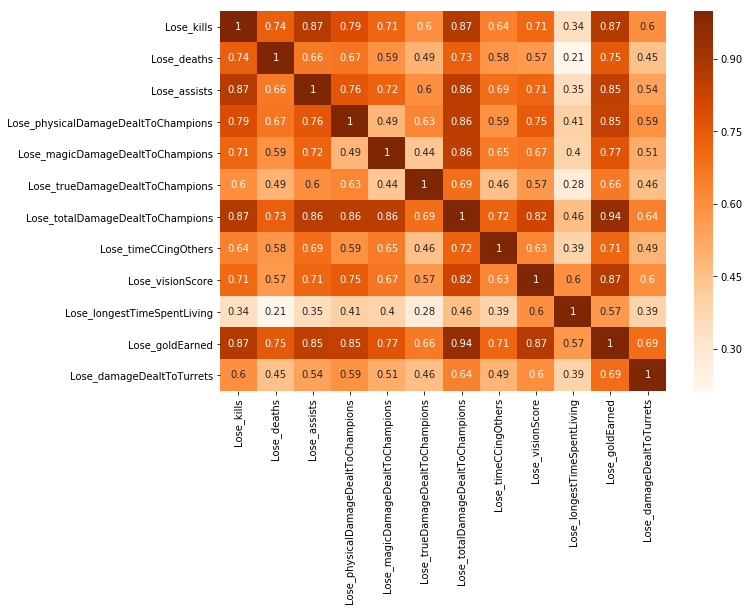

In [130]:
losers = team[[col for col in team.columns if 'Lose' in col]]

plt.figure(figsize=(10, 7))
sns.heatmap(losers.corr(), annot=True, cmap='Oranges');  

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


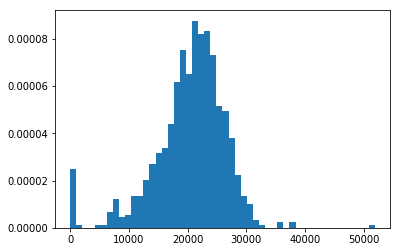

In [140]:
plt.hist(team['Win_damageDealtToTurrets'],bins=50, normed=True);


In [148]:
url_champ = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion.json'
champion_names = requests.get(url_champ).json()

url_rune = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/runesReforged.json'
rune_names = requests.get(url_rune).json()

rune_names

[{'id': 8100,
  'key': 'Domination',
  'icon': 'perk-images/Styles/7200_Domination.png',
  'name': 'Domination',
  'slots': [{'runes': [{'id': 8112,
      'key': 'Electrocute',
      'icon': 'perk-images/Styles/Domination/Electrocute/Electrocute.png',
      'name': 'Electrocute',
      'shortDesc': "Hitting a champion with 3 <b>separate</b> attacks or abilities in 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'>adaptive damage</lol-uikit-tooltipped-keyword>.",
      'longDesc': "Hitting a champion with 3 <b>separate</b> attacks or abilities within 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br>Damage: 30 - 180 (+0.4 bonus AD, +0.25 AP) damage.<br><br>Cooldown: 25 - 20s<br><br><hr></hr><i>'We called them the Thunderlords, for to speak of their lightning was to invite disaster.'</i>"},
     {'id': 8124,
      'key': 'Predator',